In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats
from scipy.stats import f_oneway

# Notes

# Eric
## What I looked for:
    Created histogram for 2020's AgeCategory, and saw if there was a correlation between BMI and if they had heart disease
## NOTES: READ THIS
    2020 data says if patient had heart disease while 2022 doesn't, not sure if i missed the column, but it might be good to focus on 2020 for now

In [8]:
df2020 = pd.read_csv("heart_2020_cleaned.csv")
df2020

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,Yes,27.41,Yes,No,No,7.0,0.0,Yes,Male,60-64,Hispanic,Yes,No,Fair,6.0,Yes,No,No
319791,No,29.84,Yes,No,No,0.0,0.0,No,Male,35-39,Hispanic,No,Yes,Very good,5.0,Yes,No,No
319792,No,24.24,No,No,No,0.0,0.0,No,Female,45-49,Hispanic,No,Yes,Good,6.0,No,No,No
319793,No,32.81,No,No,No,0.0,0.0,No,Female,25-29,Hispanic,No,No,Good,12.0,No,No,No


In [9]:
df2022 = pd.read_csv("heart_2022_no_nans.csv")
df2022

FileNotFoundError: [Errno 2] No such file or directory: 'heart_2022_no_nans.csv'

In [ ]:
print(df2020.columns)
print(df2022.columns)
print(df2020.columns.intersection(df2022.columns))

In [ ]:
# remaps columns in 2022 to match those in 2020, i didn't use this but it could be helpful

df2022["KidneyDisease"] = df2022["HadKidneyDisease"]
df2022["SkinCancer"] = df2022["HadSkinCancer"]
df2022["Asthma"] = df2022["HadAsthma"]
df2022["PhysicalActivity"] = df2022["PhysicalActivities"]
df2022["Diabetes"] = df2022["HadDiabetes"]
df2022["SleepTime"] = df2022["SleepHours"]
df2022["GenHealth"] = df2022["GeneralHealth"]
df2022["Race"] = df2022["RaceEthnicityCategory"]
df2022["DiffWalking"] = df2022["DifficultyWalking"]
df2022["PhysicalHealth"] = df2022["PhysicalHealthDays"]
df2022["MentalHealth"] = df2022["MentalHealthDays"]
df2022["Stroke"] = df2022["HadStroke"]
df2022["AlcoholDrinking"] = df2022["AlcoholDrinkers"]
df2022["Smoking"] = df2022["SmokerStatus"]

## Part 1: Eric
### Null Hypothesis: There is no association between BMI and Heart Disease
### Alternative Hypothesis: There is an association between BMI and Heart Disease
### alpha = 0.05

In [ ]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(20, 10))

ax1.hist(df2020[df2020["HeartDisease"] == "Yes"]["BMI"], bins=40)
ax2.hist(df2020[df2020["HeartDisease"] == "No"]["BMI"], bins=40)

ax1.set_title('BMI Histogram for Heart Disease Patients')
ax2.set_title('BMI Histogram for Non Heart Disease Patients')

for ax in (ax1, ax2):
    ax.set_xlabel("BMI")
    ax.set_ylabel("Count")
    ax.set_xbound(lower=0, upper=80)

In [ ]:
data_crosstab = pd.crosstab(pd.cut(df2020["BMI"], 40), df2020["HeartDisease"])
data_crosstab

In [ ]:
chi_contingency = scipy.stats.contingency.chi2_contingency(data_crosstab)
chi_contingency

## Conclusion

As we can see from the chi square test, comparing the distribution of BMI's of individuals without heart disease and BMI's of individuals with heart disease, we optain a p-value of 1.404e-211, which is less than our alpha of 0.05. As such we reject the null hypothesis, and conclude that there is an association between heart disease and bmi

## Part 2: Krishnan

### Null Hypothesis: There is no significant difference in the average sleep time between people with heart disease and those without heart disease
### Alternative Hypothesis: There is a significant difference in the average sleep time between people with heart disease and those without heart disease.
### alpha = 0.05

In [ ]:
sleeptime_heart_disease = df2020[df2020["HeartDisease"] == "Yes"]["SleepTime"]
sleeptime_no_heart_disease = df2020[df2020["HeartDisease"] == "No"]["SleepTime"]

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 10))

ax1.hist(sleeptime_heart_disease)
ax2.hist(sleeptime_no_heart_disease)

ax1.set_title('Sleep Time Histogram for Heart Disease Patients')
ax2.set_title('Sleep Time Histogram for Non Heart Disease Patients')

for ax in (ax1, ax2):
    ax.set_xlabel("Sleep Time")
    ax.set_ylabel("Count")

## Explanation
I conducted a t-test to determine whether there was a significant difference in the average sleep time between those with heart disease and those without heart disease, or not. I used a t-test for this hypothesis since I am comparing the same mean values (sleep time) between two independent groups (heart disease and no heart disease). The data meets the normality condition required for the t-test because according to the **Central Limit Theorem**, distributions with greater than 30 samples are normal. The distributions of sleep times for people with and without heart disease have greater than 30 samples each.

In [ ]:
t_test = scipy.stats.ttest_ind(sleeptime_heart_disease, sleeptime_no_heart_disease)
print(f"Test Statistic: {t_test.statistic}")
print(f"P-Value: {t_test.pvalue}")

## Conclusion

Since I obtained a p-value of **2.4915865758826605e-06** from the t-test, which is less than our significance level of 0.05, I reject the null hypothesis. **Therefore, there is a significant difference in the average sleep time between those with heart disease and without heart disease**

## Part 3: Shrinav

### Null Hypothesis: There is no difference in average sleep time among different general health categories

### Alternative Hypothesis: At least one general health category has an average sleep time significantly different from the others

In [12]:
df = df2020
groups = df.groupby('GenHealth')['SleepTime'].apply(list)

anova = f_oneway(*groups)

print(anova.pvalue)

2.7127311027595126e-284


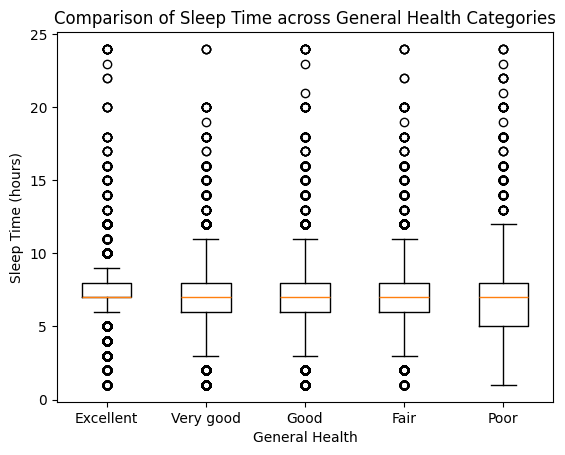

In [11]:
cats = ['Excellent', 'Very good', 'Good', 'Fair', 'Poor']
data_to_plot = [df[df['GenHealth'] == category]['SleepTime'] for category in cats]

plt.boxplot(data_to_plot, tick_labels=cats)

plt.title('Comparison of Sleep Time across General Health Categories')
plt.xlabel('General Health')
plt.ylabel('Sleep Time (hours)')
plt.show()


## Conclusion

### Since our p-value is less than 0.05, we reject the null hypothesis, meaning there is a statistically significant difference in average sleep time among the different general health categories. This indicates that at least one general health group differs notably from the others in terms of sleep duration.